<h1 style="color:rgb(0,120,170)">Assignment 5: Ensemble Methods</h1>

<h2 style="color:rgb(0,120,170)">Copyright and Fair Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you, as a student, to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - your 8-digit student number on ID card (without k)</li>
</ol>

**Example:**<br>
 ✅ Assignment_0_RenéDescartes_12345678<br>
 ✅ Assignment_0_SørenAabyeKierkegaard_12345678<br>
 ❌ Assignment0_Peter_Pan_k12345678

Don't add any cells but use the ones provided by us. You may notice that most cells are tagged such that the unittest routine can recognise them.

We highly recommend you to develop your code within the provided cells. You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type. Don't import any other packages than listed in the cell with the "imports" tag.

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest they won't be available either.

*Good luck!*

<h2 style="color:rgb(0,120,170)">Task 1: AdaBoostM1 is an instance of forward stagewise modelling</h2>


In the lecture it was mentioned that one of the first boosting algorithms, i.e. AdaBoostM1, is equivalent to forward stagewise modelling using the exponential loss $L(y,g(\mathbf{x}))=\exp(-yg(\mathbf{x}))$ for a binary classification problem. In this task we intend to provide proof of this fact. We will guide you through the most important steps and you will have to add some details.

For AdaBoostM1, the basis functions at timestep $n$ are the individual classifiers $b_n(\mathbf{x}) \in \left\{ -1,1 \right\}$. We assume that all of them are slightly better than random guessing. Note that we use $b_n$ here for the resulting classifier at timestep $n$, which differs slightly from the notation in the slides, mainly to not confuse it with the corresponding approximation from forward stagewise modelling, which is also called $g_n$ there. 

Using the exponential loss in each timestep $n$ we have to solve 
$$(\beta_n,b_n)= \arg \min_{\beta,b} \sum_{i=1}^l \exp(-y_i(g_{n-1}(\mathbf{x}_i)+\beta b(\mathbf{x}_i)),$$ for the classifier $b_n$ and the coefficient $\beta_n$ which are added at each step. This can be rewritten as
$$(\beta_n,b_n)= \arg \min_{\beta,b} \sum_{i=1}^l w_i^{(n)} \exp(-y_i \beta b(\mathbf{x}_i)), \qquad (1)$$ with $w_i^{(n)}=\exp(-y_i g_{n-1}(\mathbf{x}_i))$. Since each $w^{(n)}_i$ depends neither on $\beta$ nor $b$, it can be regarded as a weight that is applied to each observation. This weight depends on $g_{n−1}(\mathbf{x}_i)$, and so the individual weight values change with each iteration $n$. The solution of (1) can be found in two steps:

<h3 style="color:rgb(210,90,80)">Calculation 1 (10 points):</h3>

In the **first step** fix $\beta \geq 0$ and show that in this case the solution to (1) is $b_n=\arg \min_{b} \sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i)$. Hints:<ol>
<li>Try to write the expressions in (1) after $\arg \min$ in the form $\sum_{b(\mathbf{x}_i)=y_i}(...)+\sum_{b(\mathbf{x}_i)\ne y_i}(...)$. <br>Find the right expressions for (...), such that the product $b(\mathbf{x}_i)y_i$ doesn't appear there anymore.<br><br>
<li>Now show that this can be written as <br>$(\exp(\beta)-\exp(-\beta))\sum_{b(\mathbf{x}_i)\ne y_i}w_i^{(n)}+ \exp(-\beta) \sum_{i=1}^l w_i^{(n)}.\qquad (2)$ <br>The equation $\sum_{i} w_i^{(n)} = \sum_{b(\mathbf{x}_i)\ne y_i}w_i^{(n)} + \sum_{b(\mathbf{x}_i)= y_i}w_i^{(n)}$ might be helpful.<br><br>    
<li>Argue why this already implies the claim.</li></ol>
    

**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**


*Write your **first step** calculation here*
<ol>
    <li> Hint 1 ...</li>
    $b(\mathbf{x}_i)$ and $y_i$ have either the value 1 or -1. So if $b(\mathbf{x}_i)=y_i$ then $-y_i b(\mathbf{x}_i) = -1$. Otherwise $-y_i b(\mathbf{x}_i) = 1$. Therefore:
    $ \sum_{i=1}^l w_i^{(n)} \exp(-y_i \beta b(\mathbf{x}_i)) = \sum_{b(x_{i})=y_{i}}^{} w_{i}^{(n)}exp(-\beta ) + \sum_{b(x_{i})\neq y_{i}}^{} w_{i}^{(n)}exp(\beta )$ 
     
<li> Hint 2 ...</li>
    Then we have:
    $\sum_{b(x_{i})=y_{i}}^{} w_{i}^{(n)}exp(-\beta ) + \sum_{b(x_{i})\neq y_{i}}^{} w_{i}^{(n)}exp(\beta ) =$
    $exp(-\beta )\sum_{b(x_{i})=y_{i}}^{} w_{i}^{(n)}  + exp(\beta ) \sum_{b(x_{i})\neq y_{i}}^{} w_{i}^{(n)} =$
    $(exp(\beta ) - exp(-\beta ))\sum_{b(x_{i})\neq y_{i}}^{} w_{i}^{(n)} + exp(-\beta )\sum_{i=1}^{l} w_{i}^{(n)}$ 
    
<li> Hint 3 ...</li>
     $\arg \min_b (exp(\beta ) - exp(-\beta ))\sum_{b(x_{i})\neq y_{i}}^{} w_{i}^{(n)} + exp(-\beta )\sum_{i=1}^{l} w_{i}^{(n)} $ will be the same as  $ \arg \min_b exp(\beta ) \sum_{b(x_{i})\neq y_{i}}^{} w_{i}^{(n)}$, because cases in which the classifier classified correctly don't increase the loss.
    $exp(\beta ) \sum_{b(x_{i})\neq y_{i}}^{} w_{i}^{(n)}$ can be written as $exp(\beta )\sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i)$. Since $\beta$ is fixed and not dependent on $b$, multiplication of the sum by $exp(\beta )$ will not affect the search for $ \arg \min_b$. Therefore:
    $ \arg \min_b exp(\beta )\sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i) = \arg \min_b \sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i)$
    
</ol>

<h3 style="color:rgb(210,90,80)">Calculation 2 (20 points):</h3>


In the **second step** you need to optimize the following expression with respect to $\beta$:$$(\exp(\beta)-\exp(-\beta))\sum_{b_n(\mathbf{x}_i)\ne y_i}w_i^{(n)}+ \exp(-\beta) \sum_{i=1}^l w_i^{(n)}$$ Hint: do it in the usual way (i.e. by differentiating the expression and setting it to $0$). <br><br>
Using the abbreviation $\text{err}_n= \frac{\sum_{i=1}^l w_i^{(n)} I(y_i \ne b_n(\mathbf{x}_i))}{\sum_{i=1}^l w_i^{(n)}}$ show that the obtained expression is $\beta_n=\frac12 \ln \frac{1-\text{err}_n}{\text{err}_n}$. <br>
Note that $\beta_n \geq 0$, by our assumption that all classifiers are better than random guessing, i.e. $\text{err}_n \le \frac12$, so the result is in accordance with the previous subtask.

**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

*Write your **second step** calculation here*

<ol>
    <li> Derivate ...</li>
$\frac{\partial }{\partial \beta }(\exp(\beta)-\exp(-\beta))\sum_{b_n(\mathbf{x}_i)\ne y_i}w_i^{(n)}+ \exp(-\beta) \sum_{i=1}^l w_i^{(n)} = (\exp(\beta)+\exp(-\beta))\sum_{b_n(\mathbf{x}_i)\ne y_i}w_i^{(n)} - \exp(-\beta) \sum_{i=1}^l w_i^{(n)} = 0$
    
<li> Using given abbreviation show ...</li>
$(\exp(\beta)+\exp(-\beta))\sum_{b_n(\mathbf{x}_i)\ne y_i}w_i^{(n)} - \exp(-\beta) \sum_{i=1}^l w_i^{(n)} = 0\\$
$(\exp(\beta)+\exp(-\beta))\sum_{b_n(\mathbf{x}_i)\ne y_i}w_i^{(n)} = \exp(-\beta) \sum_{i=1}^l w_i^{(n)}\\$
$(exp(\beta - (-\beta )) + exp(-\beta - (-\beta )))\sum_{b_n(\mathbf{x}_i)\ne y_i}w_i^{(n)} = \sum_{i=1}^l w_i^{(n)}\\$
$(exp(2\beta) + 1)\sum_{b_n(\mathbf{x}_i)\ne y_i}w_i^{(n)} = \sum_{i=1}^l w_i^{(n)} \\$
$exp(2\beta) = \frac{\sum_{i=1}^l w_i^{(n)}}{\sum_{b_n(\mathbf{x}_i)\ne y_i}w_i^{(n)}} -1 \\ $
$exp(2\beta) = \frac{1}{err_n} -1 = \frac{1 - err_n}{err_n} \\$
$ 2\beta = ln\frac{1 - err_n}{err_n} \\$
$ \beta = \frac{1}{2} ln\frac{1 - err_n}{err_n} \\$
Therfore:
$ \beta_n = \frac{1}{2} ln\frac{1 - err_n}{err_n} \\$


    
</ol>

<h3 style="color:rgb(210,90,80)">Calculation 3 (10 points):</h3>

In the **final step** we can update the approximation as follows: $g_n(\mathbf{x})=g_{n-1}(\mathbf{x})+\beta_n b_n(\mathbf{x})$. To finish the proof proceed by deriving the following relations:
<ol>
    <li>The weights for the next generation can be computed as follows: $w_i^{(n+1)}=w_i^{(n)} \exp(-y_i \beta_n b_n(\mathbf{x}))$.</li>
    <li>$-y_i b_n(\mathbf{x})=2I(y_i \ne b_n(\mathbf{x}_i))-1$</li>
    <li>Use these two relations to show that: $$w_i^{(n+1)}=w_i^{(n)} \exp(-\beta_n) \exp(\alpha_n I(y_i \ne b_n(\mathbf{x}_i))) \qquad (2)$$ where $\alpha_n=2\beta_n$ is the $\alpha_n$ from the AdaBoostM1 algorithm from the lecture.</li>
</ol>

**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

*Write your **final step** calculation here*

<ol>
    <li> Calculate weights ...</li>
$w_i^{(n)}=\exp(-y_i g_{n-1}(\mathbf{x}_i))\\$
$w_i^{(n+1)}=\exp(-y_i g_{n}(\mathbf{x}_i))\\$
Then I use the relation between $g_n(\mathbf{x}_i))$ and $g_{n-1}(\mathbf{x}_i))$:
    
$w_i^{(n+1)}=\exp(-y_i (g_{n-1}(\mathbf{x})+\beta_n b_n(\mathbf{x}) )) = \exp(-y_i g_{n-1}(\mathbf{x}_i))\exp(-y_i\beta_n b_n(\mathbf{x}))\\$
Then I use the fact that $w_i^{(n)}=\exp(-y_i g_{n-1}(\mathbf{x}_i))$:
    
$w_i^{(n+1)}= w_i^{(n)}\exp(-y_i\beta_n b_n(\mathbf{x}))$
    <li> ... </li>
If $b(\mathbf{x}_i)=y_i$ then $I(y_i \ne b_n(\mathbf{x}_i))=0$ and $-y_i b(\mathbf{x}_i) = -1$, so $-y_i b(\mathbf{x}_i)$ can be written as $-y_i b(\mathbf{x}_i) =2I(y_i \ne b_n(\mathbf{x}_i)) -1$. 
    
Otherwise, when $b(\mathbf{x}_i)\neq y_i$ , $I(y_i \ne b_n(\mathbf{x}_i))= 1$ and $-y_i b(\mathbf{x}_i) = 1$, so $-y_i b(\mathbf{x}_i)$ can be written as $-y_i b(\mathbf{x}_i) =2I(y_i \ne b_n(\mathbf{x}_i)) -1$.
    
Therefore $-y_i b(\mathbf{x}_i) =2I(y_i \ne b_n(\mathbf{x}_i)) -1$ in any case.
    <li> ... </li>
$w_i^{(n+1)}=w_i^{(n)} \exp(-y_i \beta_n b_n(\mathbf{x}))$. can be written as $w_i^{(n+1)}=w_i^{(n)} \exp(-y_i b_n(\mathbf{x}) \beta_n )$. Since $-y_i b(\mathbf{x}_i) =2I(y_i \ne b_n(\mathbf{x}_i)) -1$, we can substitute it to the equation:
    
$w_i^{(n+1)}=w_i^{(n)} \exp((2I(y_i \ne b_n(\mathbf{x}_i)) -1)\beta_n )$.
    
Then:
$w_i^{(n+1)}=w_i^{(n)} \exp((2I(y_i \ne b_n(\mathbf{x}_i)) -1)\beta_n ) = w_i^{(n)} \exp(2\beta_nI(y_i \ne b_n(\mathbf{x}_i)) -\beta_n )$.
    
Using the properties of exponential function:
$w_i^{(n+1)} = w_i^{(n)} \exp(2\beta_nI(y_i \ne b_n(\mathbf{x}_i)) -\beta_n ) =  w_i^{(n)} \exp(-\beta_n) \exp(2\beta_n I(y_i \ne b_n(\mathbf{x}_i)))$.
    
Because $\alpha_n=2\beta_n$, we get:
$w_i^{(n+1)} =  w_i^{(n)} \exp(-\beta_n) \exp(\alpha_n I(y_i \ne b_n(\mathbf{x}_i)))$.
    
</ol>

<h2 style="color:rgb(0,120,170)">Task 2: Random Forests and Feature importance</h2>

In this task you will train a Random Forest (RF) Classifier on a subset of fashionMNIST. You should observe how these models can immediately give you useful information about feature importance, which is a very convenient property of RFs. 

First you should re-use the given code from the previous assignment to load the whole data set (the procedure is completely analogous).

* Next implement code that filters the data set for the classes with labels 1 (trousers) and 9 (ankle boots).You should create the filtered train data set from x_train and y_train and the test data set from x_test and y_test. <br>**Hint**: Masks provide a convenient solution to this task. 
* After the filtering procedure the data samples corresponding to trousers should be labelled as 1 and the ankle boots as 0. Perform this step on the test and train data set.
* To accomplish this task, implement a function **\_filter\_()**.

<h3 style="color:rgb(210,90,80)">Code 1 (15 points):</h3>

In [20]:
#NOTE#######################################################################################################
#Please add all your imports in this cell only
############################################################################################################

#Nothing to do here
import numpy as np
import pandas as pd
import sys
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
# Set random seed to ensure reproducible runs
RSEED = 10

In [21]:
#Load training and test data (routine from last week)
data = MNIST('./dataset/')
img_train, labels_train = data.load_training()
x_train = np.array(img_train)
y_train = np.array(labels_train)
x_test,y_test = data.load_testing()
x_test = np.array(x_test)
y_test = np.array(y_test)
print(y_train)
print(y_test)

[2 9 6 ... 8 8 7]
[0 1 2 ... 8 8 1]


In [22]:
"""Function _filter_() is created to filter datasets w.r.t to given labels
@param x_train Training feature matrix
@param y_train Training labels vector
@param x_test Test feature matrix
@param y_test Test labels vector
@param labels_list list of length 2 which consists of integer labels.

@returns a tuple (x_train_filtered, y_train_filtered, x_test_filtered, y_test_filtered). 
"""
def _filter_(x_train:np.array, 
             y_train:np.array, 
             x_test:np.array, 
             y_test:np.array, 
             labels_list:list):
    
    #Your code goes here ↓↓↓
    
    ytr = y_train[np.in1d(y_train,labels_list)]
    yts = y_test[np.in1d(y_test,labels_list)]
    
    x_train_filtered = x_train[np.in1d(y_train,labels_list)]
    y_train_filtered = np.where(ytr ==9, 0, ytr)

    
    x_test_filtered = x_test[np.in1d(y_test,labels_list)]
    y_test_filtered = np.where(yts ==9, 0, yts)
    #Your code ends here _____________________________________________________________________________________
    
    return (x_train_filtered, y_train_filtered, x_test_filtered, y_test_filtered)

In [23]:
#NOTHING TO CHANGE HERE
x_train, y_train, x_test, y_test = _filter_(x_train, y_train, x_test, y_test, [1,9])
print(y_train)
print(y_test)

[0 0 0 ... 0 0 1]
[1 1 1 ... 0 0 1]


In the following we visualize a few randomly selected samples from our training data:

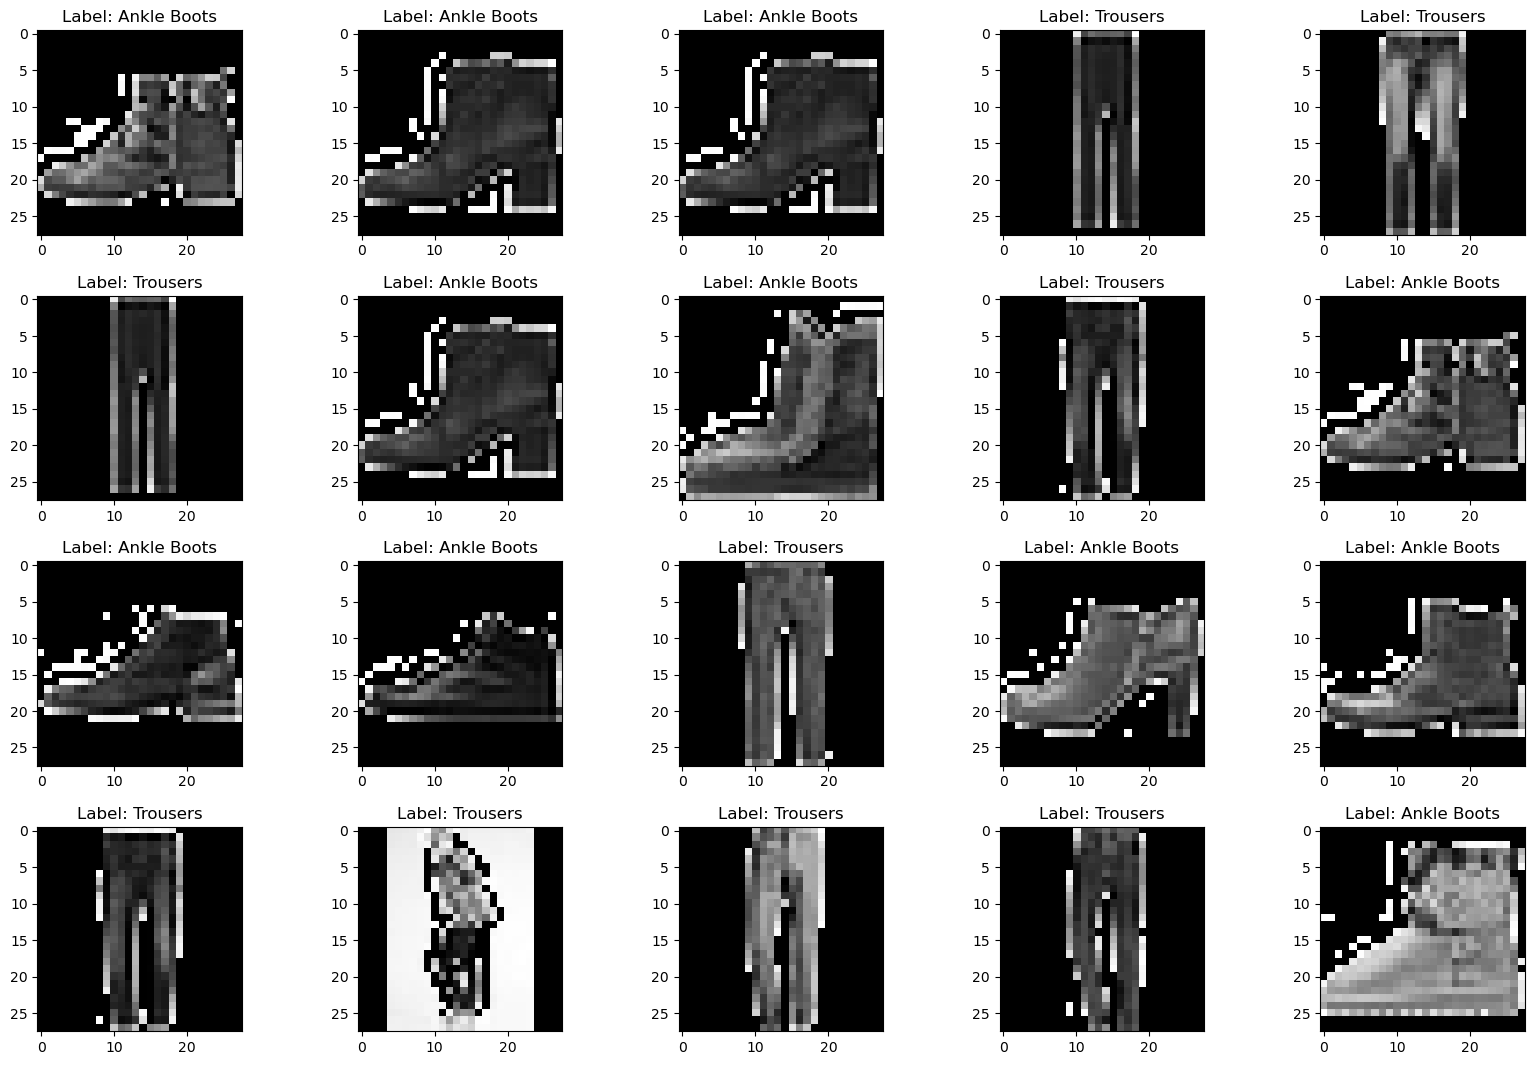

In [24]:
#A routine that you can use for plotting some of the data. 
arr = ['Ankle Boots','Trousers']
a = np.random.randint(1,40,20)
plt.figure(figsize=(20, 13))
for n,i in enumerate(a):
    plt.subplot(4, 5, n+1)
    two_d = (np.reshape(x_train[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Label: {0}'.format(arr[y_train[i]]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
plt.subplots_adjust(hspace = 0.3)

<h3 style="color:rgb(210,90,80)">Code (5 points):</h3>


Your task now is to train a sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html"> RandomForestClassifier</a> with the default parameters on the training data set. 

Then get the model's predictions for the test data set. Use **RSEED** as random_seed for the RandomForestClassifier.

For this, we ask you to implement a function fit_predict.

In [25]:
"""Function fit_predict() is created to fit RF on training data and return predictions as well as model
@param x_train Training feature matrix
@param y_train Training labels vector
@param x_test Test feature matrix
@param y_test Test labels vector
@param rseed Random Seed, integer

@returns a tuple (model, prediction). Where model is an trained RF classifier and prediction is a np array
"""
def fit_predict(x_train,y_train,x_test,y_test, rseed):
    
    #Your code goes here ↓↓↓
    clf = RandomForestClassifier(random_state = rseed)  
    model = clf.fit(x_train,y_train)
    
    prediction = clf.predict(x_test)
    #Your code ends here _____________________________________________________________________________________
    
    return model, prediction

In [26]:
model, prediction = fit_predict(x_train,y_train,x_test,y_test, RSEED)

<h3 style="color:rgb(210,90,80)">Code (15 points):</h3>

Now, within variables `size_test`, `num_wrong` save the size of the test set and number of misclassified test samples. Both variables should be integers.
Retrieve misclassified samples from test set and save them as a list `items_wrong`.


Use your predictions to plot up to 20 test data sample(s) that were **missclassified**: 

In [27]:
#NUMBER OF WRONG PREDICTIONS
#Your code goes here ↓↓↓
size_test = len(y_test)
num_wrong = np.sum(y_test != prediction).astype(np.uint8)
items_wrong =  x_test[np.where(y_test != prediction)]
#Your code ends here _____________________________________________________________________________________

#Following print statement might be evaluated
print("Number of test samples: {0}\nNumber of misclassified samples: {1}".format(size_test,num_wrong))

Number of test samples: 2000
Number of misclassified samples: 1


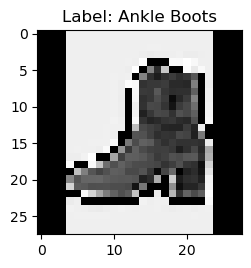

In [28]:
#PLOTTING WRONG PREDICTIONS

#Your code goes here ↓↓↓

#Use your freestlye plotting, or routine we have shown above

arr = ['Ankle Boots','Trousers']
a2 = np.where(y_test != prediction)
a2 = a2[0:20]
plt.figure(figsize=(20, 13))
for n,i in enumerate(a2):
    if(len(a2)==1):
        i = i[0]
    plt.subplot(4, 5, n+1)
    two_d = (np.reshape(x_test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Label: {0}'.format(arr[y_test[i]]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
plt.subplots_adjust(hspace = 0.3)

#Your code ends here _____________________________________________________________________________________

<h3 style="color:rgb(210,90,80)">Code (20 points):</h3>

Within this part we will try to see the decision-making incentives of Random Forest.

To do this we ask you to implement the following tasks:
<ol>
    <li>Take your training dataset and split it into 2: trousers and boots. <br>
    Calculate the average of features. Reshape averages the to 2D arrays of shape 28*28 and plot them as heatmaps. Save results under variables <b>tr_av</b> and <b>bo_av</b></li>
    <li>From the average of trousers subtract the average of boots. Save result as a variable <b>diff</b>. Plot it as a heatmap.</li>
    <li>Define the feature importance of the previously trained RF classifier witin variable  <b>importances</b>. Visualize it as a heatmap.<br>
    <b>Hint:</b> Check scikit-learn documentation to access feature importance.</li>
</ol>
    
The evaluation of the following code will be done by viewing your plots.<br><br>
**For those who are curious**: run RF under different seeds, and look how plots are changing.<br>
BEFORE SUBMISSION RETURN TO ORIGINAL SEED = 10

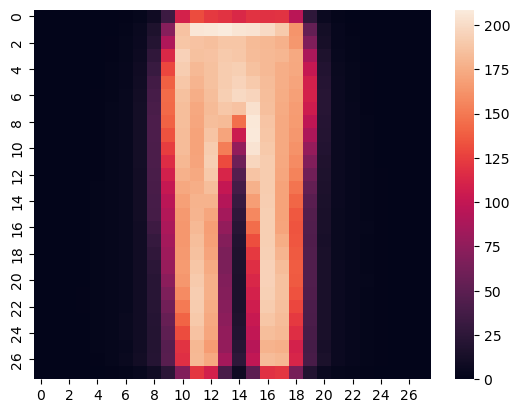

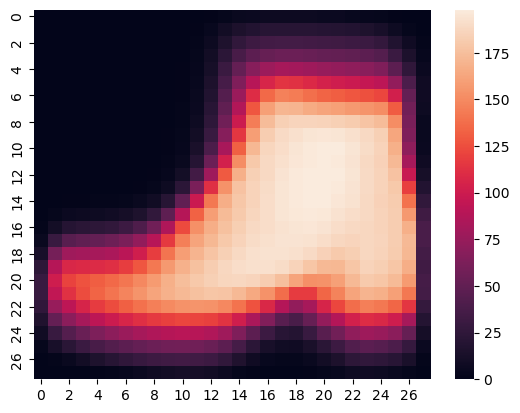

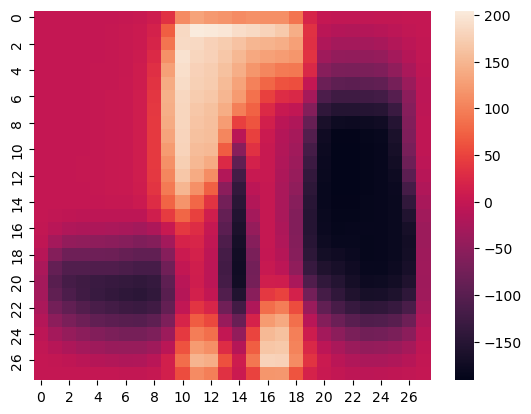

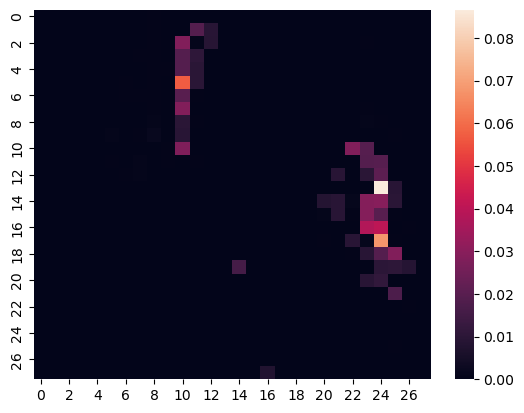

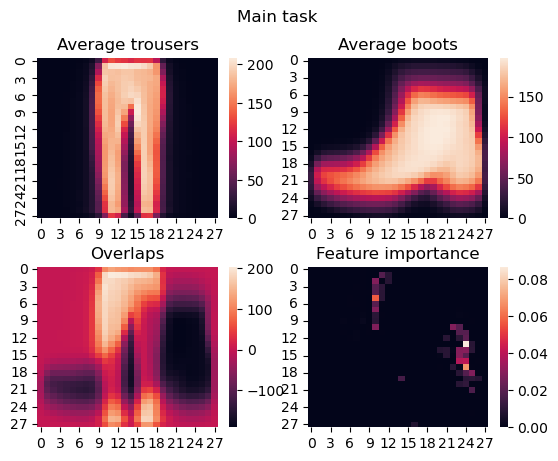

In [29]:
#PLOTTING HEATMAPS

#Your code goes here ↓↓↓

#Use your freestlye plotting
#No plots' variables are needed

#Step 1 Split and calculate averages

tr = x_train[y_train == 1]
bo = x_train[y_train == 0]

tr_av = np.mean(tr, axis=0)
bo_av = np.mean(bo, axis=0)

tr_av = np.reshape(tr_av, (28, 28)) 
bo_av = np.reshape(bo_av, (28, 28)) 

sns.heatmap(tr_av)
plt.show()
sns.heatmap(bo_av)
plt.show()


#Step 2 Subtract 
diff = np.subtract(tr_av,bo_av)

sns.heatmap(diff)
plt.show()

#Step 3 Extract feature importance
importances = model.feature_importances_
importances = np.reshape(importances, (28, 28)) 

sns.heatmap(importances)
plt.show()

#Step 4 plot everything together

htmaps = [tr_av,bo_av,diff,importances]
titles = ['Average trousers','Average boots','Overlaps','Feature importance']

fig, axes = plt.subplots(2, 2)
fig.suptitle("Main task")
for n,i in enumerate(htmaps):
    sns.heatmap(data =i,ax=axes[n//2, n%2]).set_title(titles[n])
    plt.subplots_adjust(hspace = 0.3)
#Your code ends here _____________________________________________________________________________________

If you have solved the previous task correctly, the resulting plot should look close to this:
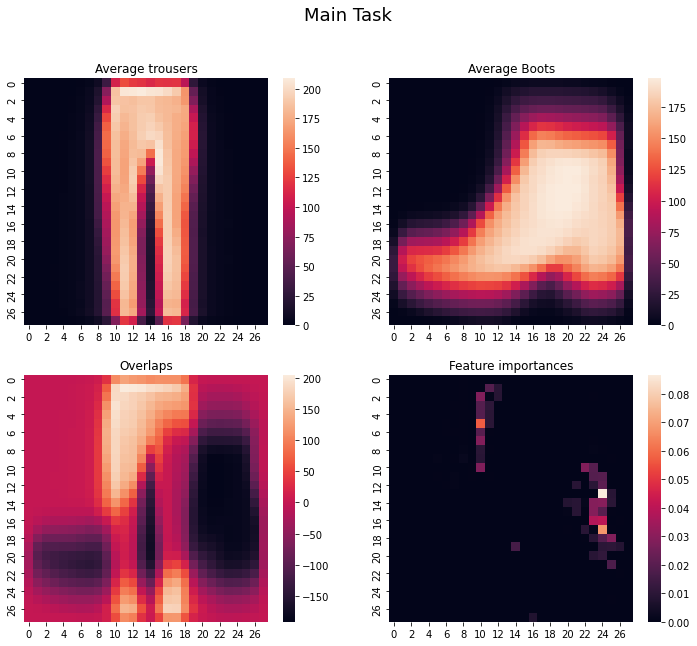

<h3 style="color:rgb(210,90,80)">Question (5 points):</h3>

What observations can you make? 
<br>(Multiple answers might be correct)

To answer the question assign to variables in the nex cell **True** or **False** boolean values. 
To earn points **assign values to all variables**.<br>
**NOTE** Do not reuse these variable names. They are used for testing.
    
a_) RF achieves accuracy lower than 85%<br>
b_) The most important features are located in image regions that primarily show either only trousers or ankle boots as depicted by the plots of average trousers and boots.<br>
c_) If one pixel would always be bright for trousers but never for ankle boots the RF classifier would certainly learn to use only this pixel as one of the features.<br>
d_) Comparing the misclassified ankle boot to other ankle boots suggests that it might be an outlier in terms of background brightness.

In [30]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
a_=False
b_=True
c_=True
d_=False

In [31]:
def filter_tl(xt,yt,xte,yte,labels_list):
    try:
        xtf, ytf, xtef, ytef = _filter_(xt,yt,xte,yte,labels_list)
        res = (xtf.tolist(), ytf.tolist(), xtef.tolist(), ytef.tolist())
        print('Filtering works')
        return res
    except Exception as e:
        print("Execution of _filter_, or convertion from np.array to list failed")
        print(e)
        raise ValueError()
        
def model_param(xt,yt,xte,yte):
    try:
        model, pred = fit_predict(xt,yt,xte,yte,RSEED)
        nfeat = model.n_features_in_
        nclass = model.n_classes_
        print("Model is valid object")
        return nfeat,nclass
    except Exception as e:
        print("Execution of fit_predict, or model parameters extraction failed")
        print(e)
        raise ValueError()
        
def testoptions(options):
    for elem in options:
        if elem!=True and elem!=False and elem!=None:
            raise ValueError(f"Check answers for questions again")
    print("Test questions answers are ok")

In [32]:
#these are dummy inputs, your code should be runnable on such
xt,yt,xte,yte = np.array([[1,1,1],[9,9,9],[5,5,5]]),np.array([1,9,5]),np.array([[0,0,0],[1,1,1],[9,9,9]]),np.array([0,1,9])

xt,yt,xte,yte = filter_tl(xt,yt,xte,yte,[1,9])
model_param(xt,yt,xte,yte)
testoptions(np.array([a_,b_,c_,d_]))
print('Executable')

Filtering works
Model is valid object
Test questions answers are ok
Executable
